# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import regex as re

import inflection

from matplotlib import pyplot as plt
from plotly import express as px
from IPython.core.display import HTML

from sklearn import cluster as c
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import metrics as m

# Helper funtions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\Lavin\anaconda3\envs\insiders_clustering\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['re']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# load data

In [3]:
df_raw = pd.read_csv('../data/raw/Ecommerce.csv',encoding= 'unicode_escape')

In [4]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [5]:
df1 = df_raw.copy()

**data dimensions**

In [6]:
df1.shape

(541909, 9)

**Rename columns**

In [7]:
old_cols = df1.columns
snakecase = lambda x: inflection.underscore(x)
new_cols = list(map(snakecase,old_cols))
df1.columns = new_cols

In [8]:
df1.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country', 'unnamed: 8'],
      dtype='object')

**delete column**

In [9]:
df1.drop(columns='unnamed: 8',inplace=True)

In [10]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# Data types

In [11]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

# Checking NA

In [12]:
df1.isnull().sum()/len(df_raw)*100

invoice_no       0.000000
stock_code       0.000000
description      0.268311
quantity         0.000000
invoice_date     0.000000
unit_price       0.000000
customer_id     24.926694
country          0.000000
dtype: float64

## replace NA

In [13]:
df_missing = df1.loc[df1['customer_id'].isna(),:]
df_missing.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,29-Nov-16,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,29-Nov-16,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,29-Nov-16,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,29-Nov-16,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,29-Nov-16,1.66,NaN,United Kingdom


In [14]:
df_not_missing = df1.loc[~df1['customer_id'].isna(),:]
df_not_missing

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France


In [15]:
# create reference
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange(19000,19000+len(df_backup),1)

#merge original with reference
df1 = pd.merge(df1,df_backup,on='invoice_no',how='left')

#coalesce
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

df1 = df1.drop(columns=['customer_id_x','customer_id_y'])

In [16]:
df1.isnull().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

In [17]:
df_backup.head()

,invoice_no,customer_id
622,536414,19000
1443,536544,19001
1970,536545,19002
1971,536546,19003
1972,536547,19004


In [18]:
#df1 = df1.dropna(subset=['description','customer_id'])

In [19]:
1- df1.shape[0]/df_raw.shape[0]

0.0

In [20]:
df1.isnull().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

# Chaging types

In [21]:
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'],format='%d-%b-%y')

In [22]:
df1['invoice_date']

0        2016-11-29
1        2016-11-29
2        2016-11-29
3        2016-11-29
4        2016-11-29
            ...    
541904   2017-12-07
541905   2017-12-07
541906   2017-12-07
541907   2017-12-07
541908   2017-12-07
Name: invoice_date, Length: 541909, dtype: datetime64[ns]

In [23]:
#df1['invoice_no'].astype(int)

In [24]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id            float64
dtype: object

'Invoice_no' possui letras em algumas linhas, necessita de limpeza mais detalhada

# Data description

In [25]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850.0


'invoice_no', : categorical atributtes

'stock_code': categorical atributtes

'description': categorical atributtes

'quantity': numerical atributtes

'invoice_date': numerical atributtes

'unit_price': numerical atributtes

'customer_id': categorical atributtes

'country': categorical atributtes

In [26]:
num_atributtes = df1[['quantity','unit_price','invoice_date']]
cat_atributtes = df1[['customer_id','description','country','invoice_no','stock_code']]

## numerical statistcs

In [27]:
num_statistcs = num_atributtes.agg(['min','max','mean','median','std','skew','kurtosis']).T
num_statistcs['range'] = num_statistcs['max'] - num_statistcs['min']
num_statistcs= num_statistcs[['min','max','range','mean','median','std','skew','kurtosis']]
num_statistcs

,min,max,range,mean,median,std,skew,kurtosis
quantity,-80995.0,80995.0,161990.0,9.55225,3.0,218.081158,-0.264076,119769.160031
unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759853,186.506972,59005.719097
invoice_date,2016-11-29 00:00:00,2017-12-07 00:00:00,373 days 00:00:00,2017-07-02 00:00:13.073782016,2017-07-17 00:00:00,115 days 21:02:59.177457004,NaN,NaN


1. - Quantity negativa (pode ser devolução)
2. - Preço unitário igual a zero (promoção?)

## Categorical statistcs

In [28]:
cat_atributtes.apply(lambda x: x.unique().shape[0])

customer_id     8082
description     4224
country           38
invoice_no     25900
stock_code      4070
dtype: int64

In [29]:
# Invoice no
#cat_atributtes.loc[cat_atributtes['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+',x))),:].drop_duplicates()
df_letter_invoice = df1.loc[df1['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+',x))),:]

df_letter_invoice

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
141,C536379,D,Discount,-1,2016-11-29,27.50,United Kingdom,14527.0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2016-11-29,4.65,United Kingdom,15311.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2016-11-29,1.65,United Kingdom,17548.0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2016-11-29,0.29,United Kingdom,17548.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2016-11-29,0.29,United Kingdom,17548.0
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2017-12-07,0.83,United Kingdom,14397.0
541541,C581499,M,Manual,-1,2017-12-07,224.69,United Kingdom,15498.0
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2017-12-07,10.95,United Kingdom,15311.0
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2017-12-07,1.25,United Kingdom,17315.0


In [30]:
len(df_letter_invoice)

9291

Todas os pedidos que possuem letra no 'invoice_no', também possuem valores positivos de quantidade

In [31]:
len(df1[df1['quantity']<0])

10624

A quantidade de pedidos que tem 'quantity' menor ou igual a zero é igual a quantidade de pedidos que possuem letra no código 'invoice_no' 

Logo se supõem que pedidos com letras no 'inovice_no' são devoluções

In [32]:
# stock code
cat_atributtes.loc[cat_atributtes['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$',x))),'stock_code'].unique()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [33]:
# description
# remoção da descrição

In [34]:
cat_atributtes['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [35]:
cat_atributtes['country'].value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

Remover 'European Community' e 'Unspecified'

# Filter

In [36]:
df2 = df1.copy()

In [37]:
# unit price > 0.0
df2 = df2.loc[df2['unit_price'] > 0.040,:]

#stock code != ['POST','D','M','DOT','CRUK','C2']
df2 = df2[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY','DCGSSGIRL', 'PADS', 'B', 'CRUK','C2'])]

# description
df2.drop(columns='description',inplace=True)

# country
df2 = df2[~df2['country'].isin(['European Community','Unspecified'])]

# description
## quantity - Negative numbers means product returns
df_returns = df2.loc[df2['quantity']<0,:]
df_purchase = df2.loc[df2['quantity']>0,:]

# Features enginering

In [38]:
df3 = df2.copy()

In [39]:
df3.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850.0
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850.0
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850.0
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850.0
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850.0


## Feature creation

In [40]:
df_ref = pd.DataFrame(df3['customer_id'])

In [41]:
df_ref =  df_ref.drop_duplicates(ignore_index=True)

### Receita bruta

**Gross Revenue**

In [42]:
df_purchase.loc[:,'gross_revenue'] = df_purchase.loc[:,'quantity'] * df_purchase.loc[:,'unit_price']
df_monetary = df_purchase[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()
df_ref = pd.merge(df_ref,df_monetary,on='customer_id',how='left')

C:\Users\Lavin\anaconda3\envs\insiders_clustering\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


### Rencencia - dias da ultima compra

In [43]:
df_recency = df_purchase[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max()- df_recency['invoice_date']).dt.days
df_recency = df_recency.drop(columns = 'invoice_date')
df_ref = pd.merge(df_ref,df_recency,on='customer_id',how='left')

### Quantidade de compras

In [44]:
df_purc_quant = df_purchase[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge(df_ref,df_purc_quant,on='customer_id',how='left')

### Quantidade de produtos comprados

In [45]:
df_prod_quant = df_purchase[['customer_id','quantity']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge(df_ref,df_prod_quant,on='customer_id',how='left')

### Quantidade  de produtos comprados por cesta (basket size)

In [46]:
df_aux = (df_purchase.loc[:,['customer_id','invoice_no','quantity']].groupby('customer_id')
                                                          .agg(n_purchase = ('invoice_no','nunique'),
                                                               n_products = ('quantity','sum'))
                                                          .reset_index())

df_aux['avg_basket_size'] = df_aux['n_products']/df_aux['n_purchase']

#merge
df_ref = pd.merge(df_ref,df_aux[['avg_basket_size','customer_id']],on='customer_id',how='left')

### Quantidade  de produtos unicos comprados por compra (basket size)

In [47]:
df_aux = (df_purchase.loc[:,['customer_id','invoice_no','stock_code']].groupby('customer_id')
                                                          .agg(n_purchase = ('invoice_no','nunique'),
                                                               n_products = ('stock_code','count'))
                                                          .reset_index())

df_aux['avg_unique_basket_size'] = df_aux['n_products']/df_aux['n_purchase']

#merge
df_ref = pd.merge(df_ref,df_aux[['avg_unique_basket_size','customer_id']],on='customer_id',how='left')

### Frequência

**Frequência**

In [48]:
# df_freq_max =df3[['customer_id','invoice_date']].drop_duplicates().groupby('customer_id').max()
# df_freq_min =df3[['customer_id','invoice_date']].drop_duplicates().groupby('customer_id').min()
# df_freq_pruchase = df3[['customer_id','invoice_date']].drop_duplicates().groupby('customer_id').count()

df_aux = (df3[['customer_id','invoice_no','invoice_date']].drop_duplicates()
                                                          .groupby('customer_id')
                                                          .agg(max_ = ('invoice_date','max'),
                                                               min_ = ('invoice_date','min'),
                                                               days_ = ('invoice_date',lambda x:(x.max()-x.min()).days+1),
                                                               buy_  = ('invoice_date','count'))
                                                          .reset_index())
                                                          

df_aux['freq'] = df_aux.apply(lambda x: x['buy_']/x['days_'] if x['days_'] !=0 else 0,axis=1)
df_ref = pd.merge(df_ref,df_aux[['customer_id','freq']],on='customer_id',how='left')

In [49]:
df_ref.isnull().sum()

customer_id                0
gross_revenue             91
recency_days              91
invoice_no                91
quantity                  91
avg_basket_size           91
avg_unique_basket_size    91
freq                       0
dtype: int64

### Valor médio do ticket

**Average ticket**

In [50]:
df_avg_ticket = df_purchase[['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue':'avg_ticket'})
df_ref = pd.merge(df_ref,df_avg_ticket,on='customer_id',how='left')

### Média de recência em dias

In [51]:
df_aux = df3.loc[:,['customer_id','invoice_date']].drop_duplicates().sort_values(['customer_id','invoice_date'],ascending=['False','False'])
df_aux['next_customer_id'] = df_aux['customer_id'].shift()
df_aux['prev_invoice_date'] = df_aux['invoice_date'].shift()
df_aux['avg_rec_days'] = df_aux.apply(lambda x: (x['invoice_date'] - x['prev_invoice_date']).days if (x['next_customer_id'] == x['customer_id']) else np.nan, axis=1)
df_aux = df_aux.drop(columns=['invoice_date','next_customer_id','prev_invoice_date']).dropna()
df_avf_rec = df_aux.groupby('customer_id').mean().reset_index()
df_avf_rec.head()

# merge
df_ref = pd.merge(df_ref,df_avf_rec, on = 'customer_id',how='left')
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no,quantity,avg_basket_size,avg_unique_basket_size,freq,avg_ticket,avg_rec_days
0,17850.0,5391.21,372.0,34.0,6.0,50.970588,8.735294,0.486111,18.152222,35.500000
1,13047.0,3232.59,56.0,9.0,11.0,154.444444,19.000000,0.048780,18.904035,27.250000
2,12583.0,6705.38,2.0,15.0,24.0,335.200000,15.466667,0.045699,28.902500,23.187500
3,13748.0,948.25,95.0,5.0,8.0,87.800000,5.600000,0.017921,33.866071,92.666667
4,15100.0,876.00,333.0,3.0,2.0,26.666667,1.000000,0.136364,292.000000,8.600000


### Devoluções

**Returns**

In [52]:
df_avg_returns = df_returns[['customer_id','quantity']].drop_duplicates().groupby('customer_id').sum().abs().reset_index().rename(columns={'quantity':'qtde_returns'})
df_ref = pd.merge(df_ref,df_avg_returns,on='customer_id',how='left')
df_ref.loc[df_ref['qtde_returns'].isna(),'qtde_returns'] = 0

In [53]:
df_ref.isnull().sum()

customer_id                  0
gross_revenue               91
recency_days                91
invoice_no                  91
quantity                    91
avg_basket_size             91
avg_unique_basket_size      91
freq                         0
avg_ticket                  91
avg_rec_days              2816
qtde_returns                 0
dtype: int64

In [54]:
df_ref = df_ref.dropna()

In [55]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no,quantity,avg_basket_size,avg_unique_basket_size,freq,avg_ticket,avg_rec_days,qtde_returns
0,17850.0,5391.21,372.0,34.0,6.0,50.970588,8.735294,0.486111,18.152222,35.500000,21.0
1,13047.0,3232.59,56.0,9.0,11.0,154.444444,19.000000,0.048780,18.904035,27.250000,6.0
2,12583.0,6705.38,2.0,15.0,24.0,335.200000,15.466667,0.045699,28.902500,23.187500,50.0
3,13748.0,948.25,95.0,5.0,8.0,87.800000,5.600000,0.017921,33.866071,92.666667,0.0
4,15100.0,876.00,333.0,3.0,2.0,26.666667,1.000000,0.136364,292.000000,8.600000,22.0


In [56]:
df4 = df_ref.copy()

# EDA

In [59]:
df5 = df4.copy()

# Data preparation

In [63]:
df6 = df5.copy()

In [64]:
df6.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'invoice_no',
       'quantity', 'avg_basket_size', 'avg_unique_basket_size', 'freq',
       'avg_ticket', 'avg_rec_days', 'qtde_returns'],
      dtype='object')

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
ss = StandardScaler()

df6['gross_revenue'] = ss.fit_transform(df6[['gross_revenue']])
df6['recency_days'] = ss.fit_transform(df6[['recency_days']])
df6['invoice_no'] = ss.fit_transform(df6[['invoice_no']])
df6['quantity'] = ss.fit_transform(df6[['quantity']])
df6['avg_basket_size'] = ss.fit_transform(df6[['avg_basket_size']])
df6['avg_unique_basket_size'] = ss.fit_transform(df6[['avg_unique_basket_size']])
df6['freq'] = ss.fit_transform(df6[['freq']])
df6['avg_rec_days'] = ss.fit_transform(df6[['avg_rec_days']])
df6['qtde_returns'] = ss.fit_transform(df6[['qtde_returns']])
df6['avg_ticket'] = ss.fit_transform(df6[['avg_ticket']])

In [67]:
df6.head()

,customer_id,gross_revenue,recency_days,invoice_no,quantity,avg_basket_size,avg_unique_basket_size,freq,avg_ticket,avg_rec_days,qtde_returns
0,17850.0,0.250430,3.958055,3.196786,-0.897073,-0.250716,-0.687652,3.144866,-0.032545,-0.501344,-0.020793
1,13047.0,0.045982,-0.106616,0.370594,-0.098785,-0.119972,-0.161518,-0.107756,-0.031820,-0.631199,-0.030771
2,12583.0,0.374898,-0.801212,1.048880,1.976766,0.108422,-0.342625,-0.130675,-0.022176,-0.695143,-0.001501
3,13748.0,-0.170373,0.395036,-0.081597,-0.577758,-0.204180,-0.848357,-0.337271,-0.017388,0.398464,-0.034762
4,15100.0,-0.177216,3.456402,-0.307692,-1.535704,-0.281425,-1.084137,0.543639,0.231593,-0.924752,-0.020127


# Feature selection

In [68]:
df7 = df6.copy()

# Fine tuning

In [69]:
X = df7.drop(columns='customer_id')

In [70]:
clusters = [2,3,4,5,6,7]

## Within-Cluster Sum of Square (WSS)

In [71]:
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10,max_iter=300,random_state=42)
    #model training
    kmeans.fit(X)
    
    wss.append(kmeans.inertia_)

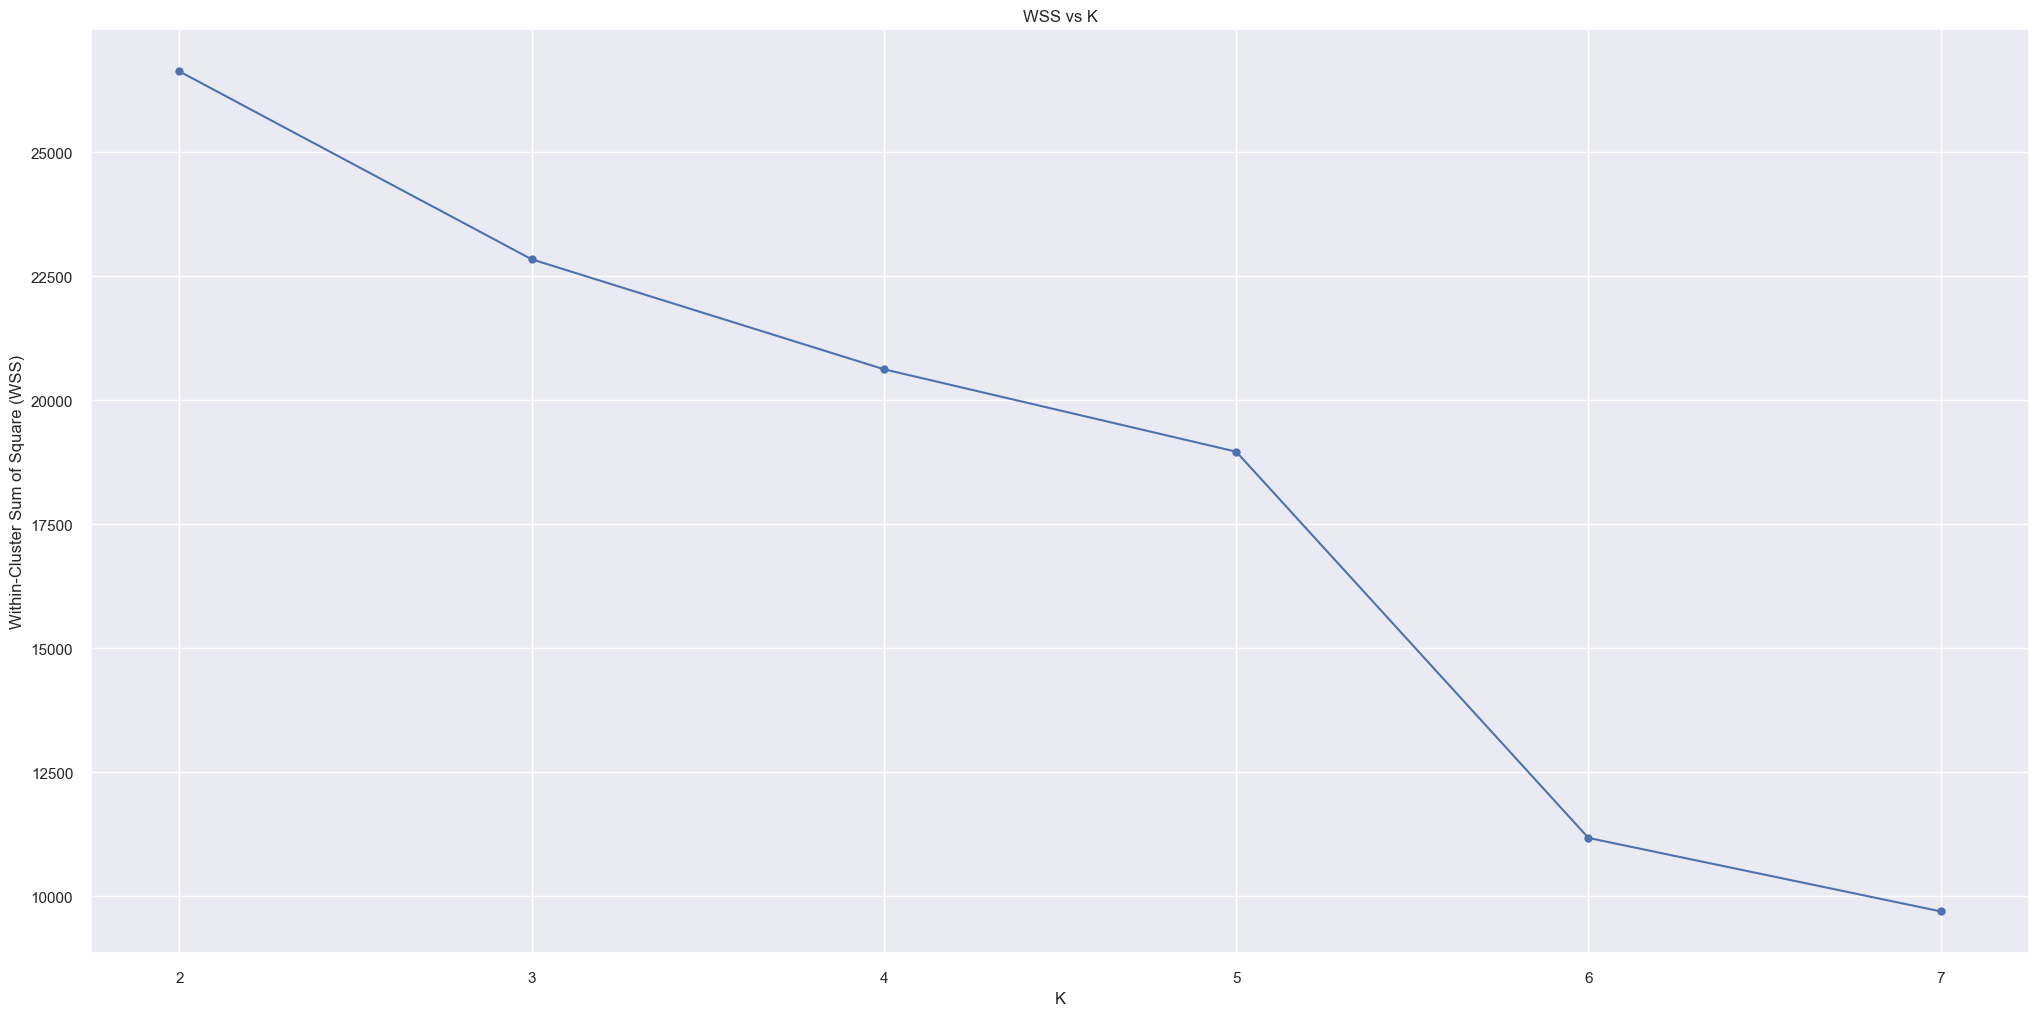

In [72]:
plt.plot(clusters,wss, marker = 'o');
plt.xlabel('K');
plt.ylabel('Within-Cluster Sum of Square (WSS)');
plt.title('WSS vs K');

Escolher os pontos com maior variação

C:\Users\Lavin\anaconda3\envs\insiders_clustering\lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Lavin\anaconda3\envs\insiders_clustering\lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


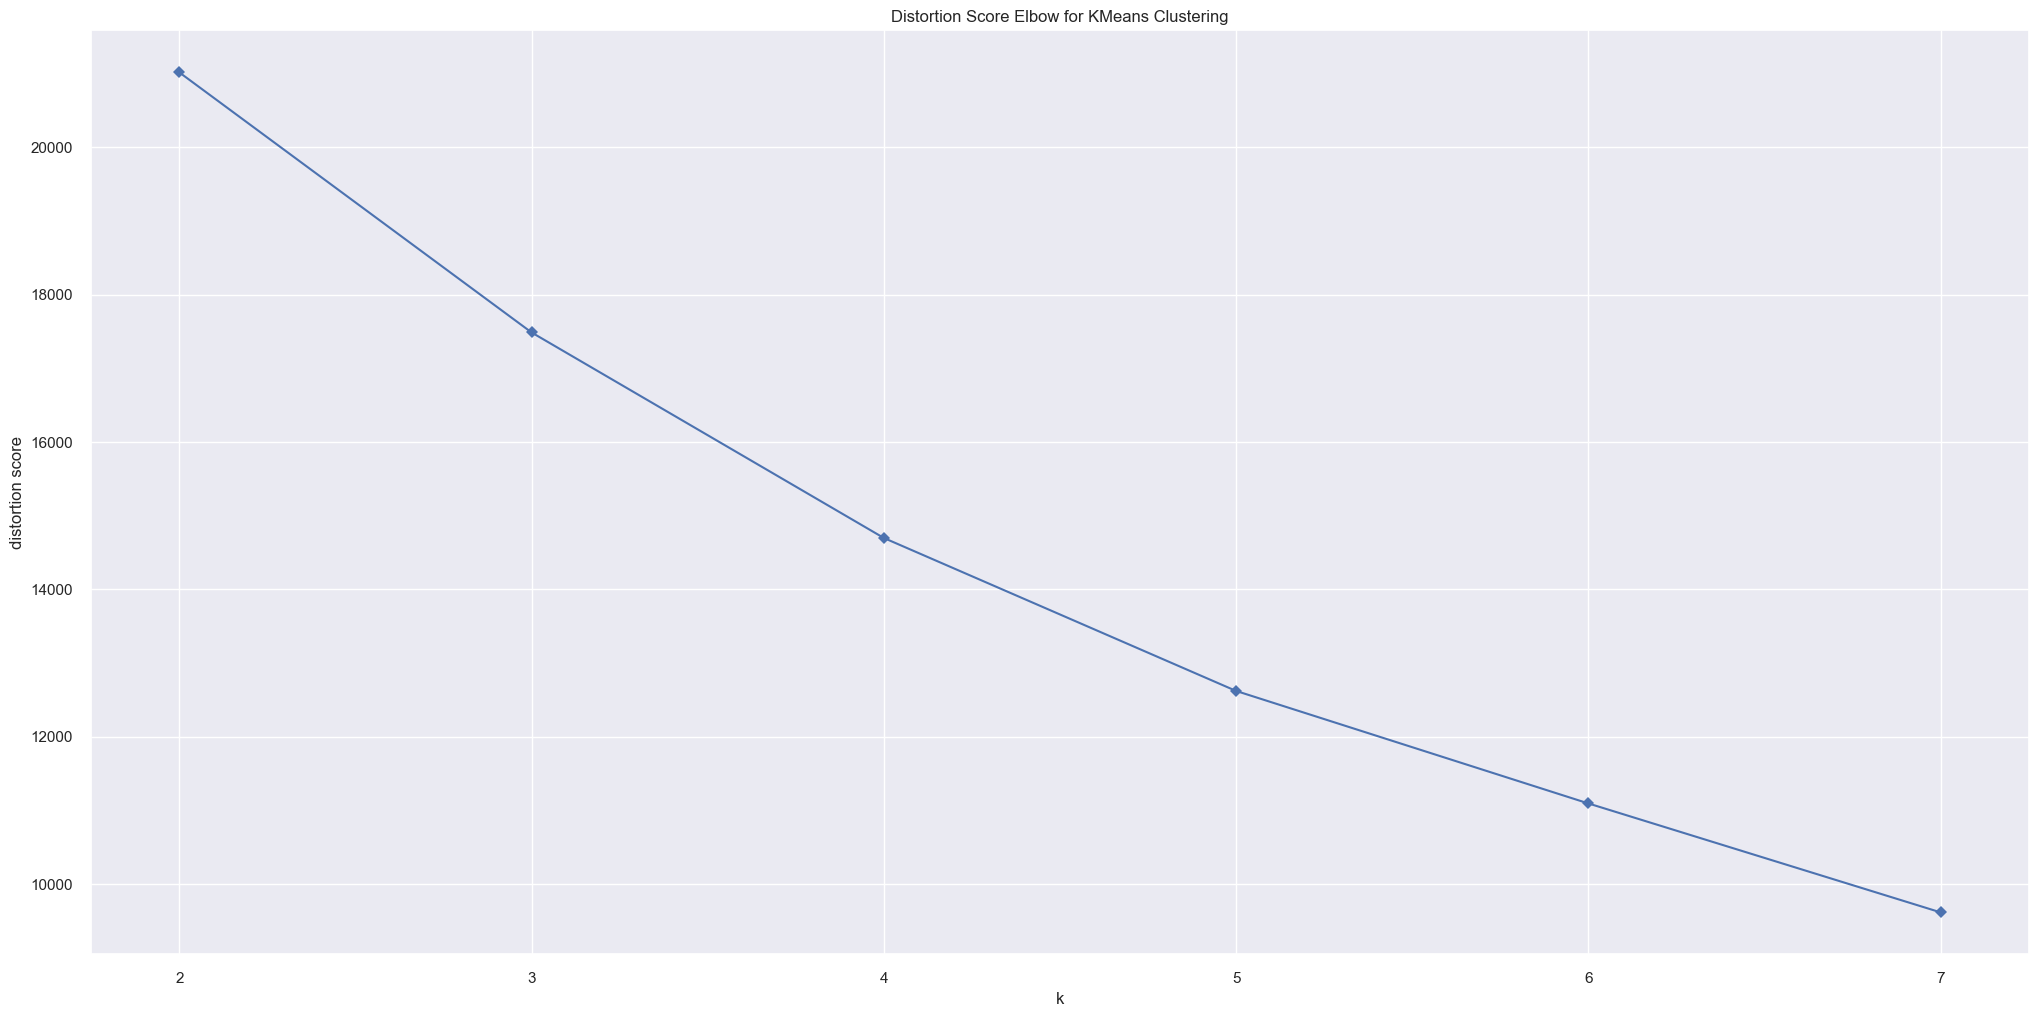

In [73]:
kmeans = KElbowVisualizer(c.KMeans(),k=clusters,timings=False)
kmeans.fit(X)
kmeans.show();

## Sillhouete Score

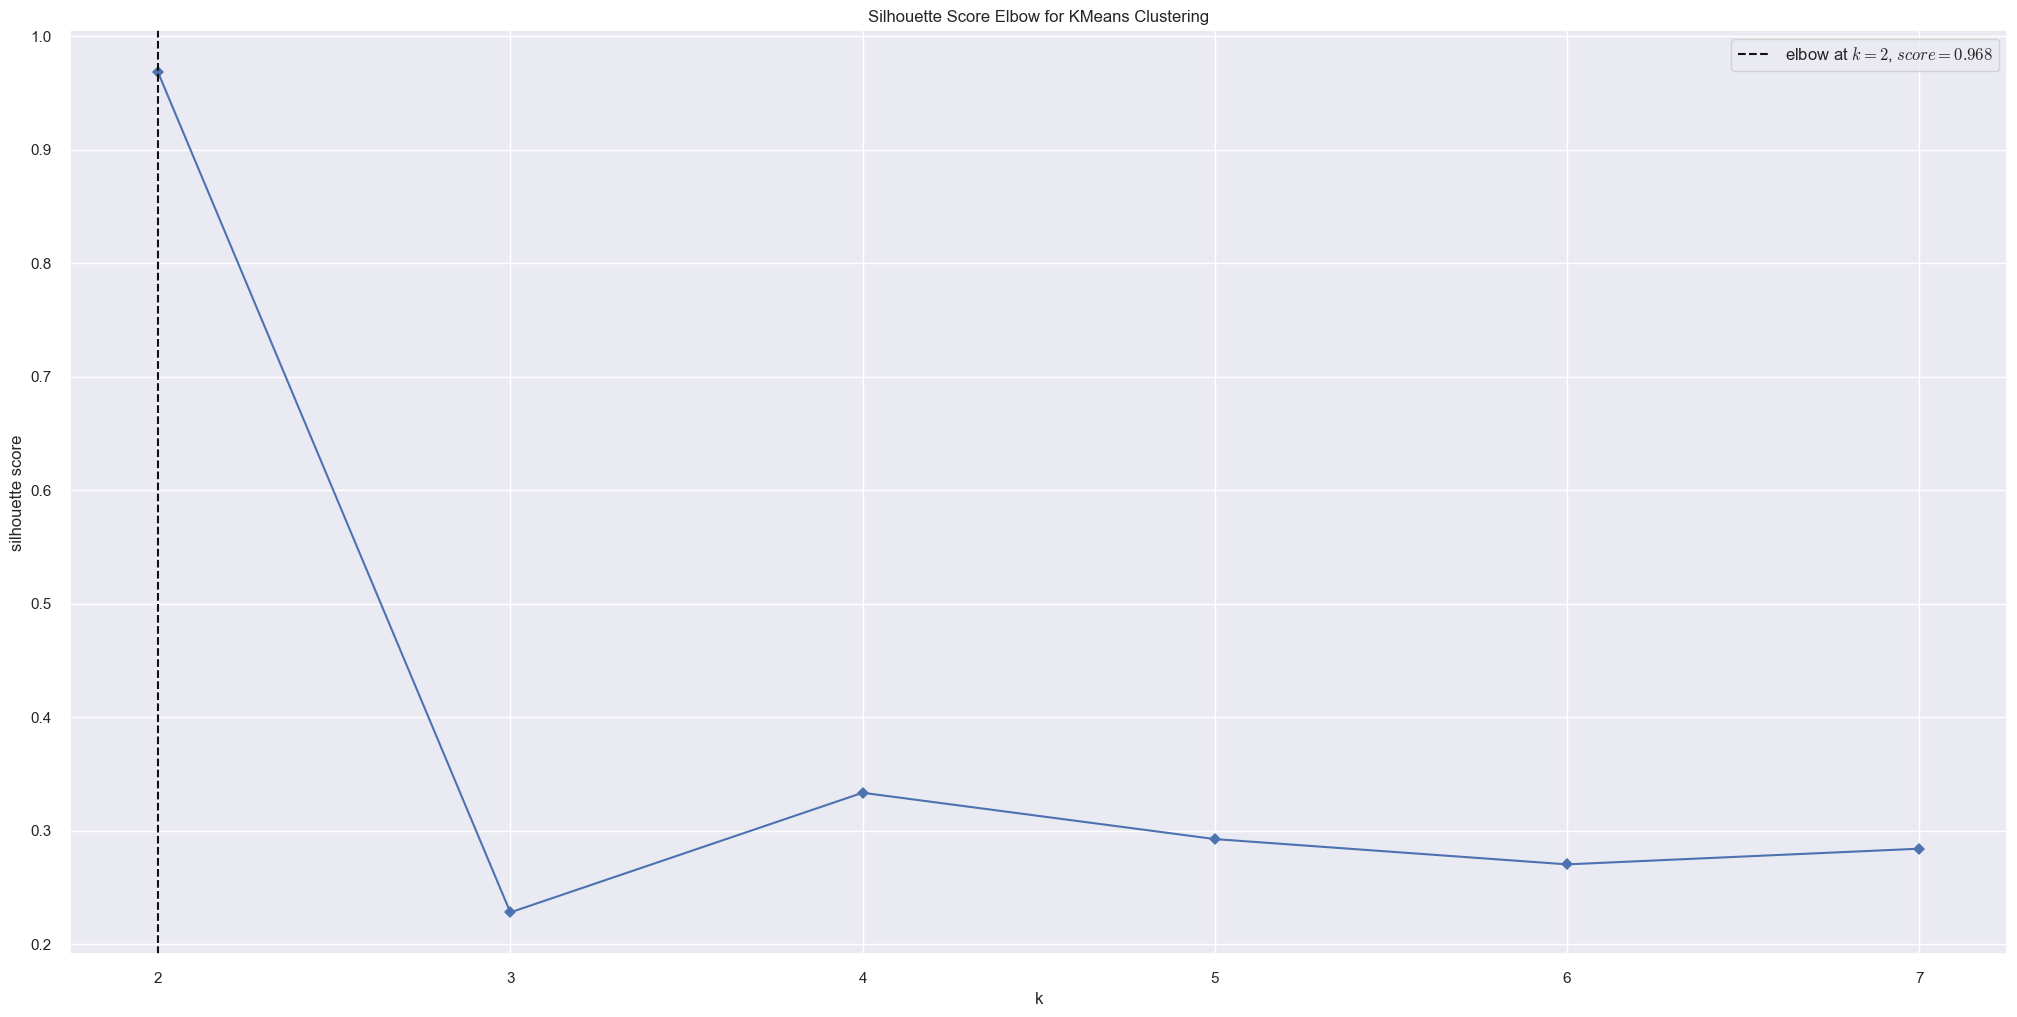

In [74]:
kmeans = KElbowVisualizer(c.KMeans(),k=clusters,metric='silhouette',timings=False)
kmeans.fit(X)
kmeans.show();

## Silhouete analisys

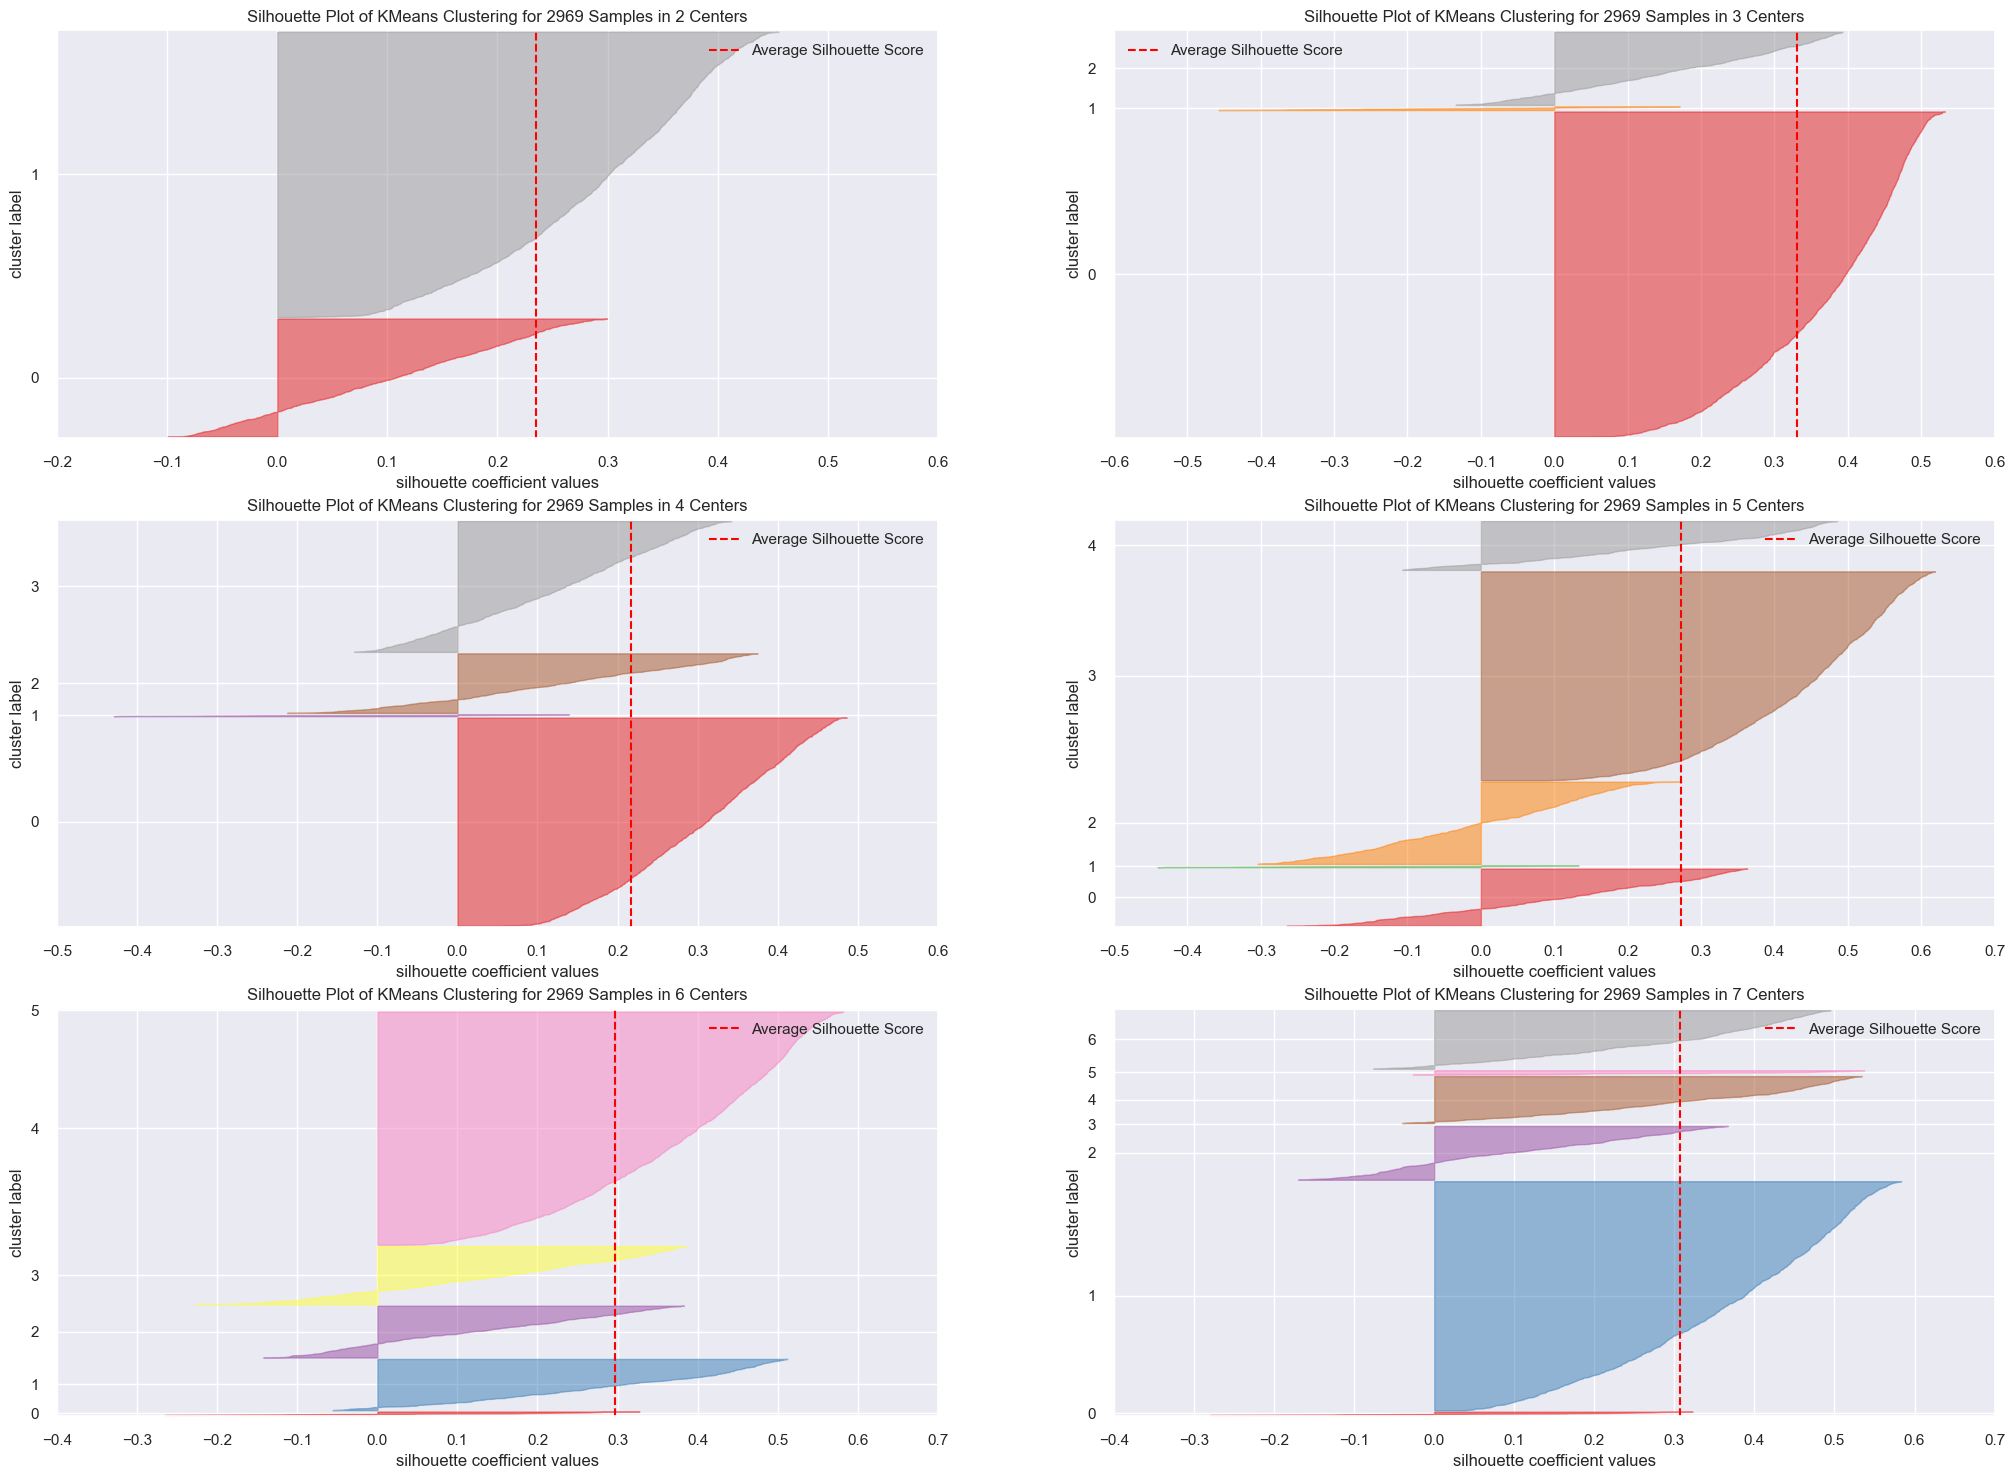

In [75]:
fig, ax = plt.subplots(3,2,figsize=(25,18))
#k=2
for k in clusters:
    from sklearn import cluster as c
    km = c.KMeans(n_clusters=k,init='random',n_init=10, max_iter=100,random_state=42)
    l,c = divmod(k,2)
    visualizer = SilhouetteVisualizer(km, color='yellowbrick',ax=ax[l-1][c])
    visualizer.fit(X)
    visualizer.finalize()

# Model training

## K-means

In [76]:
from sklearn import cluster as c

In [77]:
#model training
k = 3
kmeans = c.KMeans(init='random',n_clusters=k,n_init=10,max_iter=300,random_state=42)
#model training
kmeans.fit(X)
#clustering
labels = kmeans.labels_

### Cluster validation

In [78]:
# WSS
print('WSS value',kmeans.inertia_)

## SS (Silhouette Score)
print('SS value',m.silhouette_score(X,labels,metric='euclidean'))

WSS value 22843.21269101394
SS value 0.33099780218362485


### Cluster analysis

In [79]:
df9 = df7.copy()
df9['clusters'] = labels

C:\Users\Lavin\anaconda3\envs\insiders_clustering\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


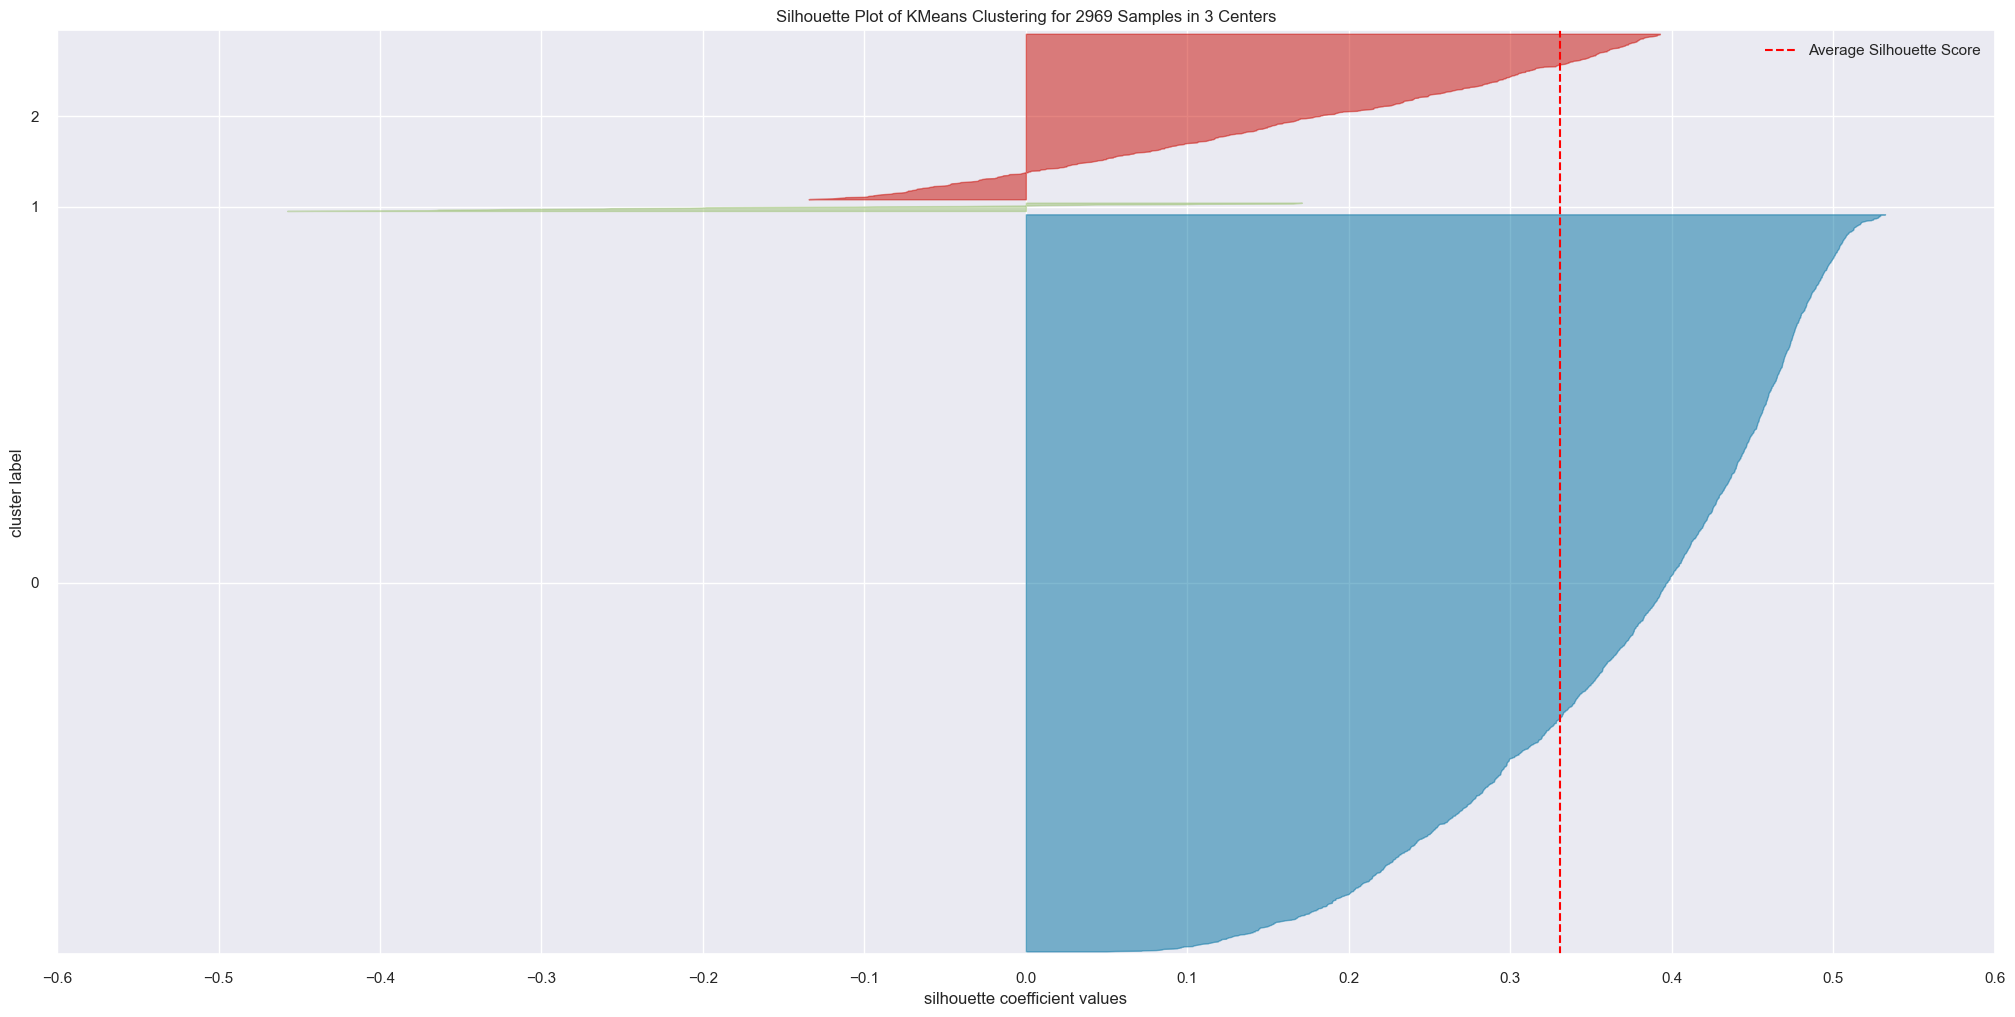

In [80]:
visualizer = SilhouetteVisualizer(kmeans,colors='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

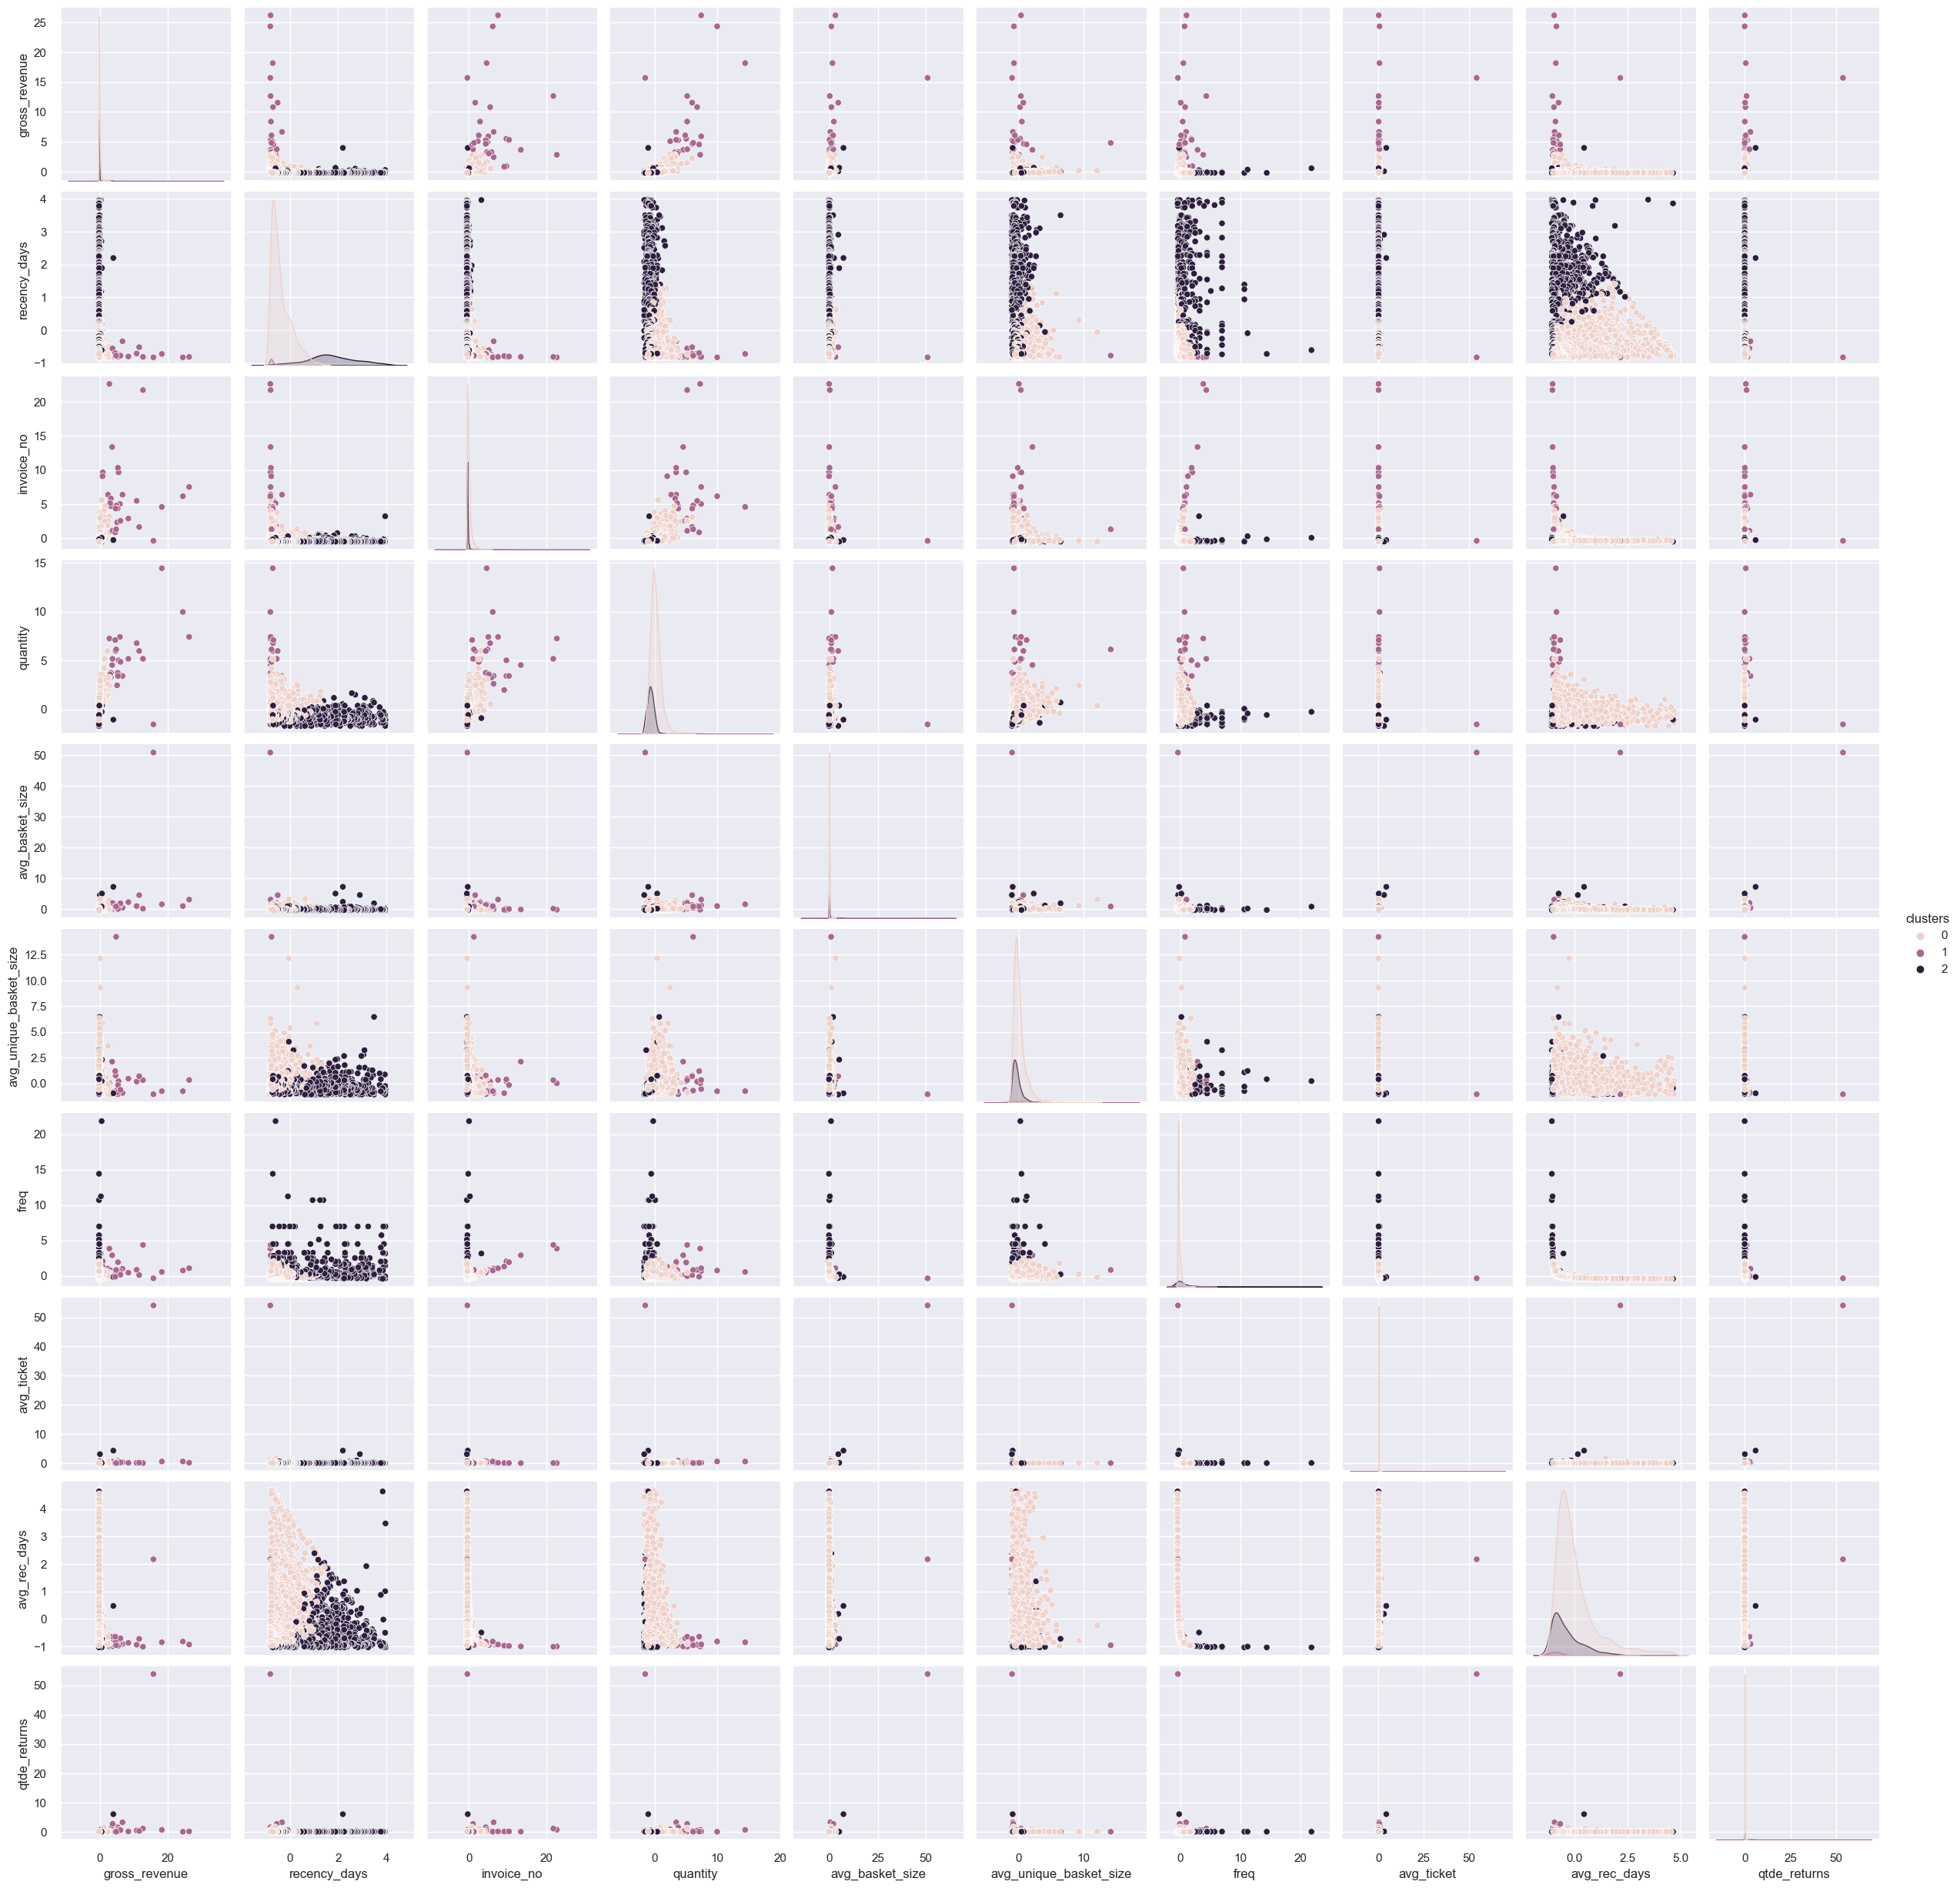

In [81]:
df_viz = df9.drop(columns='customer_id',axis=1)
sns.pairplot(df_viz,hue='clusters')

### UMAP - t-SNE
### Machine leraning - Manifold
PCA - Matrix, Espaço de distâncias - 9 condições - Colorários
UMAP, T-SNE (2009) - Manifold - Topologia

**UMAP**

In [82]:
import umap.umap_ as umap

In [83]:
reducer = umap.UMAP(n_neighbors=100,random_state=42)
embedding = reducer.fit_transform(X)

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

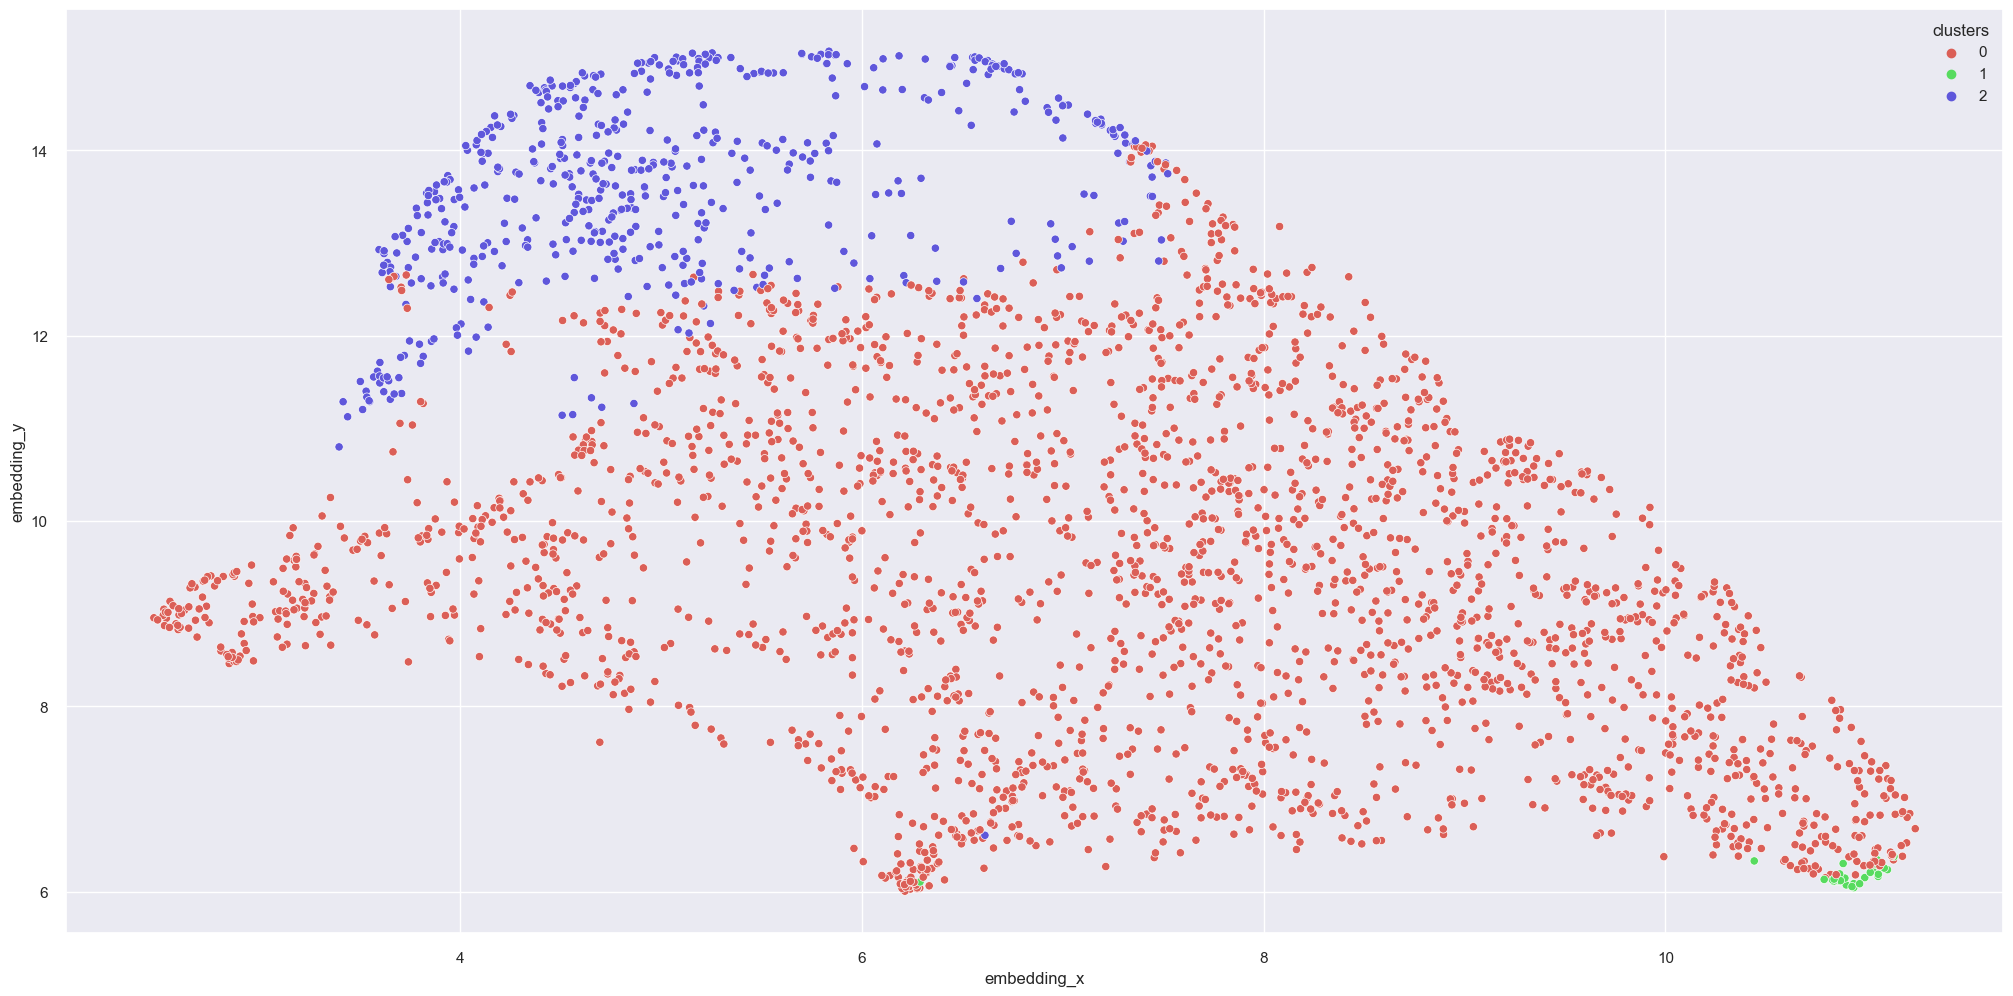

In [84]:
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

sns.scatterplot(x='embedding_x',y='embedding_y',hue='clusters', palette=sns.color_palette('hls',n_colors=len(df_viz['clusters'].unique())),data = df_viz)

In [85]:
#fig = px.scatter_3d(df9,x='recency_days',y='invoice_no',z='gross_revenue',color='clusters')
#fig.show()

### Cluster profile

In [86]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,quantity,avg_basket_size,avg_unique_basket_size,freq,avg_ticket,avg_rec_days,qtde_returns,clusters
0,17850.0,0.250430,3.958055,3.196786,-0.897073,-0.250716,-0.687652,3.144866,-0.032545,-0.501344,-0.020793,2
1,13047.0,0.045982,-0.106616,0.370594,-0.098785,-0.119972,-0.161518,-0.107756,-0.031820,-0.631199,-0.030771,0
2,12583.0,0.374898,-0.801212,1.048880,1.976766,0.108422,-0.342625,-0.130675,-0.022176,-0.695143,-0.001501,0
3,13748.0,-0.170373,0.395036,-0.081597,-0.577758,-0.204180,-0.848357,-0.337271,-0.017388,0.398464,-0.034762,0
4,15100.0,-0.177216,3.456402,-0.307692,-1.535704,-0.281425,-1.084137,0.543639,0.231593,-0.924752,-0.020127,2


In [87]:
# number of customers
df_cluster = df9[['customer_id','clusters']].groupby('clusters').count().reset_index()
df_cluster['perc_customer'] = (df_cluster['customer_id']/df_cluster['customer_id'].sum())*100
# Avg gross revenue
df_avg_gross_revenue = df9[['gross_revenue','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_gross_revenue,how='inner',on='clusters')

# avg recency days
df_avg_recency_days =  df9[['recency_days','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_recency_days,how='inner',on='clusters')

# avg invoice no
df_avg_invoice_no =  df9[['invoice_no','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_avg_invoice_no,how='inner',on='clusters')

df_ticket =  df9[['avg_ticket','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster,df_ticket,how='inner',on='clusters')

In [88]:
df_cluster

,clusters,customer_id,perc_customer,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,2401,80.868979,-0.046328,-0.378660,0.010828,-0.024023
1,1,28,0.943078,7.500459,-0.747463,6.386345,2.058015
2,2,540,18.187942,-0.182923,1.722391,-0.379289,0.000103


## visualisation